In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForUbung\neo_task.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


id - индентификатор </br>
name - название объекта </br>
est_diameter_min - оценочный минимальный диаметр тела </br>
est_diameter_max - оценочный максимальный диаметр тела </br>
relative_velocity - относительная скорость </br>
miss_distance - расстояние от Земли до тела </br>
absolute_magnitude - абсолютная величина </br>
hazardous - опасность для Земли

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


Заполним пропущенные значения:</br> 
absolute_magnitude медианой est_diameter_min </br>
relative_velocity средним miss_distance </br>
est_diameter_max средней разницей между est_diameter_max и est_diameter_min

In [4]:
x = lambda x: x.mean() if x.notna().any() else 0
group = df.groupby('miss_distance')['relative_velocity'].transform('mean').iat[0]
df['relative_velocity'].fillna(group, inplace=True)

x = lambda x: x.median() if x.notna().any() else 0
group = df.groupby('est_diameter_min')['absolute_magnitude'].transform(x)
df['absolute_magnitude'].fillna(group, inplace=True)

table = df['est_diameter_max'] - df['est_diameter_min']
df['est_diameter_max'].fillna(df['est_diameter_min'] + table.mean(), inplace=True)

df['name'].fillna('0 unknow', inplace=True)

df['id'].fillna(df['id'].mode()[1], inplace=True)

In [5]:
df.loc[df['absolute_magnitude'] == 0]
df = df.drop(index=df.loc[df['absolute_magnitude'] == 0].index)

In [6]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [7]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083500e+04,90835.000000,90835.000000,90835.000000,9.083500e+04,90835.000000
mean,1.431064e+07,0.127408,0.284874,48115.010220,3.706649e+07,23.527194
std,2.082931e+07,0.298427,0.666482,25224.492015,2.235216e+07,2.893974
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.441846e+06,0.019256,0.043057,28714.416772,1.721076e+07,21.340000
50%,3.746490e+06,0.048368,0.108153,44393.761140,3.784584e+07,23.700000
75%,3.881408e+06,0.143402,0.320656,62805.132825,5.654961e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [8]:
dict_patch = {
    False: 0,
    True: 1
}
df['hazardous'] = df['hazardous'].map(dict_patch)

In [9]:
df['hazardous'].value_counts()

hazardous
0    81995
1     8840
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

0

## 2. EDA

In [11]:
# df_ohne_name = df.drop('name', axis=1)

Избавление от выбросов в данных

In [12]:
# Q1 = df_ohne_name.quantile(0.25)
# Q3 = df_ohne_name.quantile(0.75)
# IQR = Q3-Q1
# data_filtered = df_ohne_name[~((df_ohne_name < (Q1 - 1.5 * IQR)) | (df_ohne_name > (Q3 + 1.5 * IQR))).any(axis=1)]
# index_list = list(data_filtered.index.values)
# data_filtered = df[df.index.isin(index_list)]
# df = data_filtered

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='absolute_magnitude', ylabel='miss_distance'>

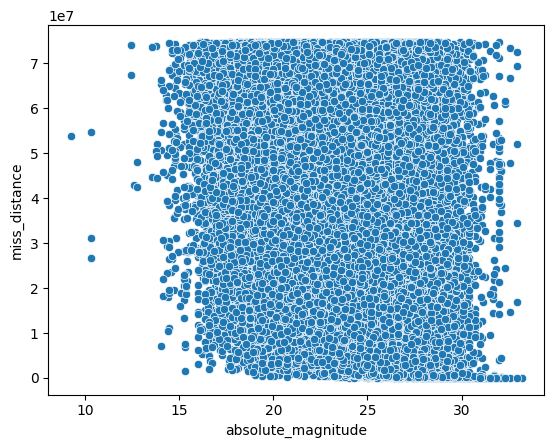

In [13]:
sns.scatterplot(df, x=df['absolute_magnitude'], y=df['miss_distance'])

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='absolute_magnitude', ylabel='relative_velocity'>

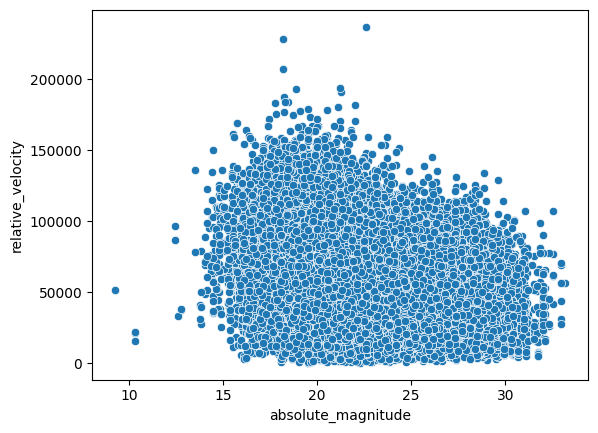

In [14]:
sns.scatterplot(df, x=df['absolute_magnitude'], y=df['relative_velocity'])

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='miss_distance', ylabel='relative_velocity'>

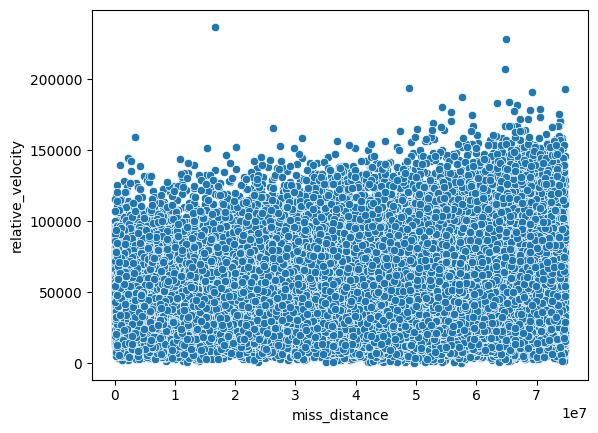

In [15]:
sns.scatterplot(df, x=df['miss_distance'], y=df['relative_velocity'])

<function matplotlib.pyplot.show(close=None, block=None)>

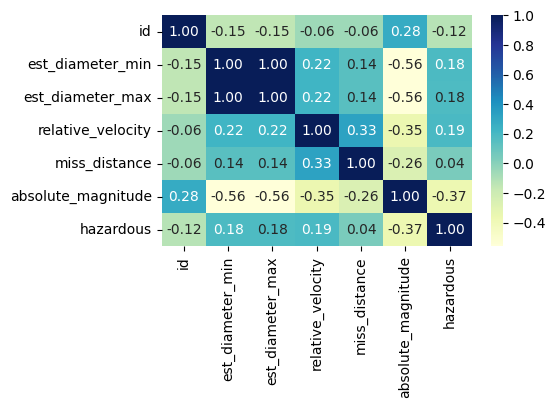

In [16]:
df_ohne_name = df.drop('name', axis=1)
correlation_matrix = df_ohne_name.corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

## 3. Масштабирование данных

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix

In [18]:
X = StandardScaler().fit_transform(df.drop(['name', 'hazardous'], axis=1))
X = pd.DataFrame(X)
Y = df['hazardous']
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, Y)

In [19]:
y_resampled.value_counts()

hazardous
0    8840
1    8840
Name: count, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.2, random_state=0)

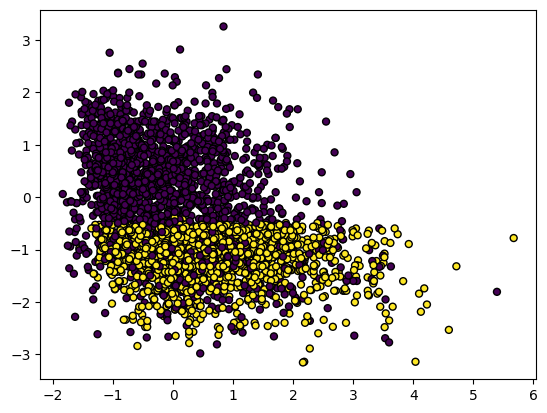

In [21]:
import matplotlib.pyplot as plt


# X_binary, y_binary = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

plt.scatter(X_train[3], X_train[5], marker="o", c=y_train, s=25, edgecolor="k")
plt.show()

In [22]:
y_train.value_counts()

hazardous
0    1822
1    1714
Name: count, dtype: int64

## 4. Классификация KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8552743212669683

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[5215, 1803],
       [ 244, 6882]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7018
           1       0.79      0.97      0.87      7126

    accuracy                           0.86     14144
   macro avg       0.87      0.85      0.85     14144
weighted avg       0.87      0.86      0.85     14144



## 5. Байесовский классификатор

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      7018
           1       0.80      0.84      0.82      7126

    accuracy                           0.81     14144
   macro avg       0.81      0.81      0.81     14144
weighted avg       0.81      0.81      0.81     14144



## 6. Логическая регрессия

In [28]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7018
           1       0.79      0.99      0.88      7126

    accuracy                           0.86     14144
   macro avg       0.89      0.86      0.86     14144
weighted avg       0.89      0.86      0.86     14144



## 7. SVM

In [29]:
model_lin = svm.LinearSVC(max_iter=10000)
model_lin.fit(X_train, y_train)
y_predict_model_lin = model_lin.predict(X_test)

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [30]:
model_sgd = SGDClassifier()
model_sgd.fit(X_train, y_train)
y_predict_model_sgd = model_sgd.predict(X_test)

In [31]:
print('SVM (линейный: )', round(cohen_kappa_score(y_predict_model_lin, y_test, weights='quadratic'), 3))
print('SVM (градиент: )', round(cohen_kappa_score(y_predict_model_sgd, y_test, weights='quadratic'), 3))


SVM (линейный: ) 0.695
SVM (градиент: ) 0.705


In [32]:
print(classification_report(y_predict_model_lin, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5800
           1       0.93      1.00      0.96      8344

    accuracy                           0.95     14144
   macro avg       0.96      0.94      0.95     14144
weighted avg       0.95      0.95      0.95     14144



In [33]:
print(classification_report(y_predict_model_sgd, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5582
           1       0.95      1.00      0.97      8562

    accuracy                           0.97     14144
   macro avg       0.97      0.96      0.96     14144
weighted avg       0.97      0.97      0.97     14144



In [34]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      7018
           1       0.80      0.91      0.85      7126

    accuracy                           0.84     14144
   macro avg       0.85      0.84      0.84     14144
weighted avg       0.85      0.84      0.84     14144



## 8. Все виды

In [35]:
classifiers = {
    'Linear SVC': svm.SVC(kernel='linear', C=11, probability=True,random_state=0),
    'KNN classifier': KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2),
    'SVC': svm.SVC()
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 85.3% 
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      7018
           1       0.79      0.96      0.87      7126

    accuracy                           0.85     14144
   macro avg       0.87      0.85      0.85     14144
weighted avg       0.87      0.85      0.85     14144

Accuracy (train) for KNN classifier: 85.5% 
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7018
           1       0.79      0.97      0.87      7126

    accuracy                           0.86     14144
   macro avg       0.87      0.85      0.85     14144
weighted avg       0.87      0.86      0.85     14144

Accuracy (train) for SVC: 86.0% 
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7018
           1       0.79      0.99      0.88      7126

    accuracy                           0.86     14144
   macro av

## 9. Метрики

# Accuracy

In [36]:
def Accuracy(Y_predict, Y_test):
    conf_matrix = confusion_matrix(Y_predict, Y_test)
    tp = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tn = conf_matrix[1, 1]
    return (tp + tn) / (tp + tn + fp + fn)

print(Accuracy(y_predict, y_test))
accuracy_score(y_predict, y_test)
    

0.8552743212669683


0.8552743212669683

# Precision

In [37]:
from sklearn.metrics import precision_score
def Precision(Y_predict, Y_test):
    conf_matrix = confusion_matrix(Y_predict, Y_test)
    tp = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    return (tp) / (tp + fp)

print(Precision(y_predict, y_test))
print(precision_score(y_predict, y_test))

0.9553031690785858
0.9657591916923941


# Recall

In [38]:
from sklearn.metrics import recall_score
def Recall(Y_predict, Y_test):
    conf_matrix = confusion_matrix(Y_predict, Y_test)
    tp = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tn = conf_matrix[1, 1]
    return (tp) / (tp + fn)

print(Recall(y_predict, y_test))
print(recall_score(y_predict, y_test))

0.7430891992020519
0.7924006908462867


# F-мера

In [39]:
from sklearn.metrics import f1_score

def F1(Y_predict, Y_test):
    return (2) / ((1/Precision(Y_predict, Y_test)) + (1/Recall(Y_predict, Y_test)))

print(F1(y_predict, y_test))
print(f1_score(y_predict, y_test))

0.8359381261521199
0.8705331731073305


## 9. KNN

In [97]:
from collections import Counter
from math import sqrt
from operator import itemgetter
from collections import OrderedDict

class KNNClassifier:

    def __init__(self, k):
        "" "Инициализировать классификатор kNN" ""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None  # Личные настройки
        self._y_train = None

    def fit(self, X_train, y_train):
        "" "Обучите классификатор kNN на основе наборов обучающих данных X_train и y_train" ""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict: pd.DataFrame):
        "" "Учитывая набор данных X_predict, который нужно спрогнозировать, вернуть результирующий вектор, представляющий X_predict" ""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x.values) for index, x in X_predict.iterrows()]
        return np.array(y_predict)

    def _predict(self, x):
        distances = {}
        
        # distances = [sqrt(np.sum((x_train.values - x) ** 2)) # Метод sqrt () возвращает квадратный корень из числа x.
        #              for index, x_train in self._X_train.iterrows()]
        
        for index, x_train in self._X_train.iterrows():
            distances[index] = sqrt(np.sum((x_train.values - x) ** 2))
        
        # print('distance', distances)
        
        nearest = OrderedDict(sorted(distances.items(),  key=itemgetter(1), reverse=True))  # сортируем словарь по возрастанию сохраняя индексы
        
        topK_y = []
        g = 0               # чтобы выбрать именно k соседей
        for index_nearest in nearest:
            if g == 13:
                break
            topK_y.append(self._y_train[index_nearest])
            g += 1
        votes = Counter(topK_y)  # Статистика

        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "KNN(k=%d)" % self.k

In [96]:
from operator import itemgetter
from collections import OrderedDict

d = {1:12, 2: 24, 3:52, 4:11}
od = OrderedDict(sorted(d.items(),  key=itemgetter(1), reverse=False))
od

OrderedDict([(4, 11), (1, 12), (2, 24), (3, 52)])

In [98]:
knn = KNNClassifier(k=11)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

accuracy_score(y_predict, y_test)

0.4705175339366516